In [22]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("/home/jerome/Documents/CSV FILE/loan data.csv")

In [4]:
df

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001256,Male,No,3750.0,176.0,N
1,LP001404,Female,Yes,3167.0,154.0,Y
2,LP001370,Male,No,7333.0,120.0,N
3,LP002435,Male,Yes,3539.0,55.0,N
4,LP001877,Male,Yes,4708.0,NaN,Y
...,...,...,...,...,...,...
9995,LP002467,Male,Yes,3708.0,173.0,N
9996,LP001630,Male,No,2333.0,102.0,N
9997,LP002053,Male,Yes,4342.0,NaN,Y
9998,LP001990,Male,No,2000.0,NaN,N


In [5]:
df.duplicated().sum()

np.int64(8696)

In [6]:
df = df.drop_duplicates()

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
ApplicantIncome    369
LoanAmount         400
Loan_Status          0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df["Loan_ID"] = df.drop("Loan_ID", axis = 1, inplace= True)

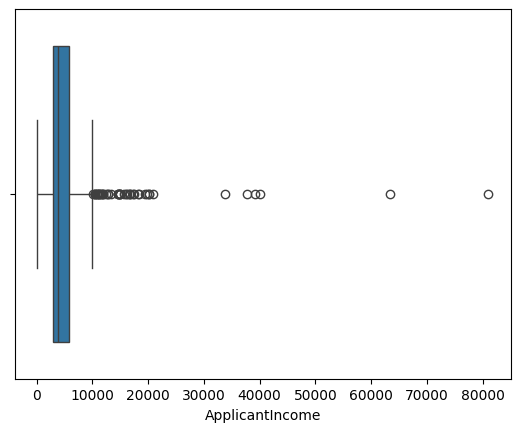

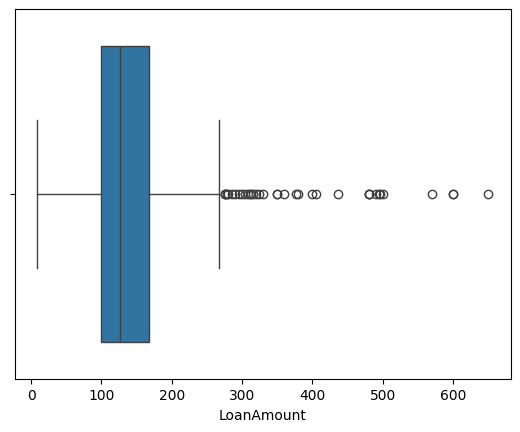

In [10]:
num = df.select_dtypes("number")
cat = df.select_dtypes("object")
for x in num.columns:
    sns.boxplot(x = num[x])
    plt.show()

In [11]:
out = []
def Zscore_cutlier(df):
    m = np.mean(df)
    sd 

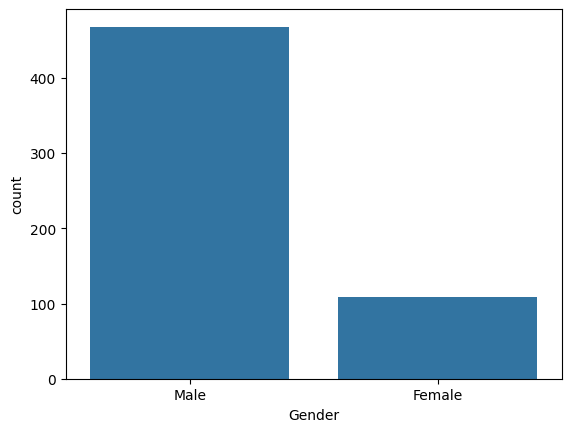

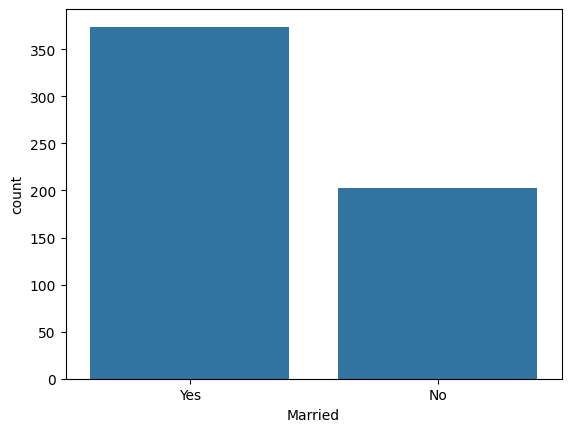

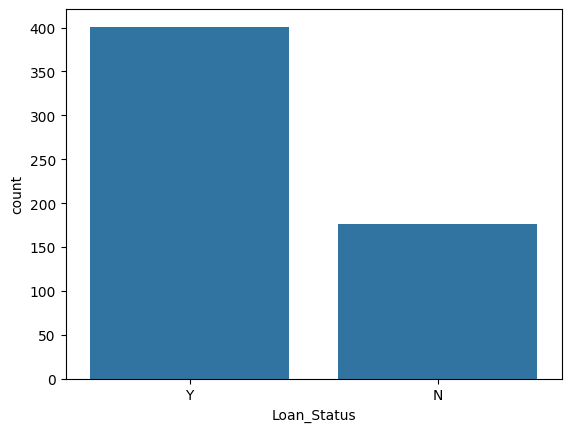

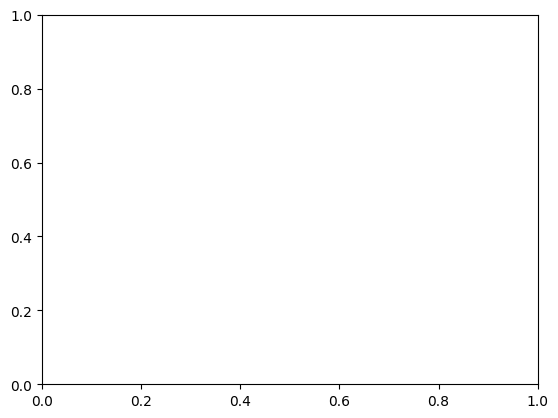

In [12]:
for y in cat.columns:
    sns.barplot(cat[y].value_counts())
    plt.show()

In [13]:
z = np.abs(zscore(df["ApplicantIncome"]))
print(z)

[2.64548010e-01 3.64237453e-01 3.48123130e-01 3.00627723e-01
 3.82191813e-01 4.91456914e-01 8.05716140e-03 2.22496550e-02
 4.53496268e-01 4.03908038e-01 5.13474231e-01 4.74487622e-01
 3.19738143e-01 2.04700145e-01 2.12736859e-01 6.80351237e-02
 1.23164861e+00 1.70501365e-01 1.14615166e+00 2.24206489e-02
 1.03642751e-01 1.36194596e+00 5.08056362e-02 3.38930356e-01
 4.27163208e-01 4.05275989e-01 2.46080669e-01 3.64408447e-01
 7.02580444e-02 3.92793434e-01 5.38309242e-01 4.00146172e-01
 2.54076486e-01 2.35992029e-01 5.15738048e-01 4.29215135e-01
 5.27194639e-01 4.25754360e-01 5.40361169e-01 1.65896236e+00
 4.78290384e-01 1.10099623e-01 3.80310880e-01 9.61190194e-02
 3.78087959e-01 5.51646766e-01 3.30209667e-01 3.25380942e-01
 3.90871605e-01 1.20188263e-01 6.27910045e-01 6.70145538e-01
 3.37049423e-01 3.99975178e-01 2.50355516e-01 4.64097890e-01
 1.75761280e-01 6.20557308e-01 2.54248784e+00 5.12318170e-01
 2.60273162e-01 9.35541109e-02 1.77129231e-01 6.49572335e-02
 5.06846365e-01 1.605297

In [14]:
z = np.abs(zscore(df["LoanAmount"]))
print(z)

[3.75532656e-01 1.09293531e-01 3.02166935e-01 1.08878253e+00
 4.11082940e-01 1.81149151e-01 6.16813173e-01 6.65975337e-01
 3.02166935e-01 5.68406060e-01 8.50899739e-02 1.30736959e+00
 2.05352708e-01 2.53759821e-01 1.57700644e-01 3.63430877e-01
 2.11818874e+00 1.08538480e-01 4.24810174e+00 2.05352708e-01
 5.44202503e-01 1.27030921e+00 7.29881955e-02 5.92609616e-01
 2.77963378e-01 4.11082940e-01 8.34645184e-01 4.95795389e-01
 5.08652218e-01 5.44202503e-01 3.99736212e-01 7.74136292e-01
 1.81149151e-01 2.53759821e-01 3.86879384e-01 1.24793035e-02
 7.25729179e-01 1.15004647e+00 9.64367020e-02 1.17425003e+00
 5.92609616e-01 1.82774606e+00 6.65975337e-01 8.43349236e-02
 3.02166935e-01 6.16813173e-01 1.20640259e-01 3.02166935e-01
 5.08652218e-01 7.26484229e-01 5.92609616e-01 2.66616650e-01
 4.83693611e-01 1.69047372e-01 4.23184719e-01 2.41658043e-01
 3.63430877e-01 6.78077115e-01 6.11177562e+00 8.10441628e-01
 4.23184719e-01 1.81149151e-01 1.37998026e+00 5.44202503e-01
 5.19998946e-01 1.811491

In [17]:
le = LabelEncoder()
for y in cat:
    df[y] = le.fit_transform(df[y])

In [18]:
X =  df.drop(columns="Loan_Status")
y = df["Loan_Status"]

In [19]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 45, stratify= y)

In [21]:
sm = SMOTE()
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [ ]:
xg = XGBClassifier()
param_grid = {
    'n_estimators': [4,5,6]
    
}